In [1]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,"In order to secure my session\nAs Admin,\nI wa...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,In order to log in to the system in case I for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,"In order to secure my account\nAs Lecturer,\nI...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program Outcomes,In order to establish Program Outcomes\nAs Cur...,Scenario: Create Program Outcomes Successfully...,Scenario: Create Program Outcomes Failed as th...,Scenario: Create Program Outcomes Failed Due t...,,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
166,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
167,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
168,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [2]:
# Fungsi untuk menggandakan data berdasarkan nilai di kolom 'Effort'
def duplicate_data(row):
    if row['Effort'] == 'M':
        return pd.DataFrame([row] * int(4620/55), columns=row.index)
    elif row['Effort'] == 'L':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)
    elif row['Effort'] == 'S':
        return pd.DataFrame([row] * int(4620/84), columns=row.index)
    elif row['Effort'] == 'XL':
        return pd.DataFrame([row] * int(4620/7), columns=row.index)
    elif row['Effort'] == 'XXL':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)

# Membuat DataFrame baru dengan data yang digandakan
df = pd.concat(df.apply(duplicate_data, axis=1).tolist(), ignore_index=True)

# Menampilkan DataFrame baru
df

,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
2,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
3,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
4,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23096,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23097,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23098,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL


In [3]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access curriculum data
As Admin,
I want to log in to the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lecturer”
A

Text Feature Extraction

In [4]:
# Case Folding and Remove Template
import re

def case_folding(text):
    return text.lower()

def remove_template_phrases(text):
    template_texts = [
        "In order to",
        "As",
        "I want",
        "I am on",
        "I press",
        "I follow",
        "I fill in",
        "I select",
        "I check",
        "I uncheck",
        "I attach the file",
        "I should see",
        "The response should contain",
        "field should contain",
        "checkbox should be checked",
        "checkbox should not be checked",
        "I should be on",
        "The url should match"
    ]

    pattern = r'\s+(' + '|'.join(template_texts) + r')\s+'
    return re.sub(pattern, ' ', text, flags=re.IGNORECASE)

df['combined'] = df['combined'].apply(case_folding)
df['combined'] = df['combined'].apply(remove_template_phrases)

In [5]:
# Remove Punctuation, Tokenisasi, Stopword Removal
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['combined'] = df['combined'].apply(remove_punctuation)
print("Hasil pembersihan teks dari tanda baca")
print(df.loc[0, 'combined'])

# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['combined'] = df['combined'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['combined'])

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['combined'] = df['combined'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['combined'][4])

Hasil pembersihan teks dari tanda baca
login access curriculum data admin  to log in to the system
scenario  login successfully admin 
given  http   127 0 0 1 8000 login 
when  nip  with  32525252523 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard admin 
and the  lecturer name   admin 
scenario  login successfully curriculum team member
given  http   127 0 0 1 8000 login 
when  nip  with  197801262006041001 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard curriculum 
and the  lecturer name   badrus zaman  s kom   m cs  	
scenario  login successfully lecturer 
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard lecturer 
and the  lecturer name   indra kharisma r  s kom   m t  
scenario  login failed due to incorrect nip or password
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Hasil stopword removal
['login', 'access', 'curriculum', 'data', 'admin', 'log', 'system', 'scenario', 'login', 'successfully', 'admin', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '32525252523', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'admin', 'lecturer', 'name', 'admin', 'scenario', 'login', 'successfully', 'curriculum', 'team', 'member', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '197801262006041001', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'lecturer', 'name', 'badrus', 'zaman', 'kom', 'cs', 'scenario', 'login', 'successfully', 'lecturer', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '198110282006041003', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'lecturer', 'lecturer', 'name', 'indra', 'kharisma', 'r', 'kom', 'scenario', 'login', 'failed', 'due', 'incorrect', 'nip', 'password', 'given', 

In [6]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['combined'] = df['combined'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['combined']

Hasil lematisasi


0        [login, access, curriculum, data, admin, log, ...
1        [login, access, curriculum, data, admin, log, ...
2        [login, access, curriculum, data, admin, log, ...
3        [login, access, curriculum, data, admin, log, ...
4        [login, access, curriculum, data, admin, log, ...
                               ...                        
23095    [delete, user, story, history, remove, irrelev...
23096    [delete, user, story, history, remove, irrelev...
23097    [delete, user, story, history, remove, irrelev...
23098    [delete, user, story, history, remove, irrelev...
23099    [delete, user, story, history, remove, irrelev...
Name: combined, Length: 23100, dtype: object

In [7]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengembalikan ke bentuk string
df['combined'] = df['combined'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,04,100,105,127,15,197101042008121001,197102111997021001,197801262006041001,198105082005012001,198110282006041003,...,within,wlfv,workshop,world,wth,x0002,xlsx,yamamaru,year,zaman
0,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
1,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
2,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
3,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
4,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23096,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23097,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23098,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


Class distribution:
L: 0.20
M: 0.20
S: 0.20
XL: 0.20
XXL: 0.20
Total count of each class:
L: 4620.0
M: 4620.0
S: 4620.0
XL: 4620.0
XXL: 4620.0


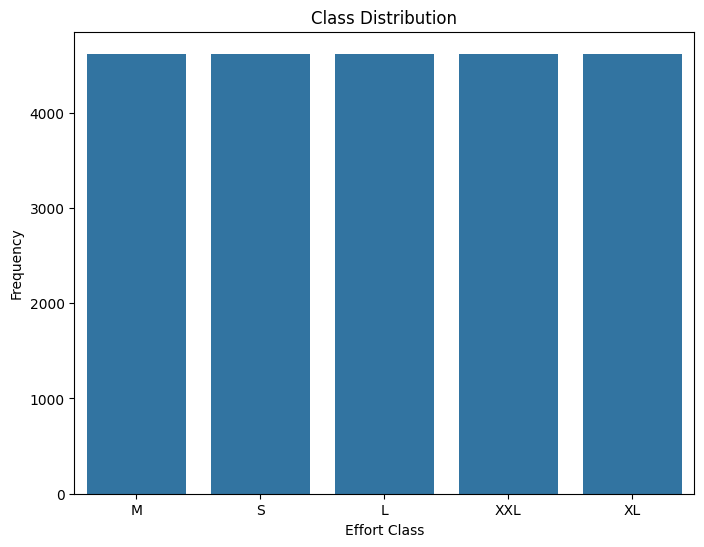

In [9]:
# Distribusi Kelas
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       1.00      0.02      0.04      3864
           S       0.09      0.94      0.16       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.09      0.09      0.09     11179
   macro avg       0.22      0.19      0.04     11179
weighted avg       0.35      0.09      0.03     11179
 samples avg       0.09      0.09      0.09     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.353358545170376     Recall: 0.0911530548349584      Accuracy: 0.08363896591823955      F1 Score: 0.028827719378114156

Confusion matrix for test project 'Akobesi':


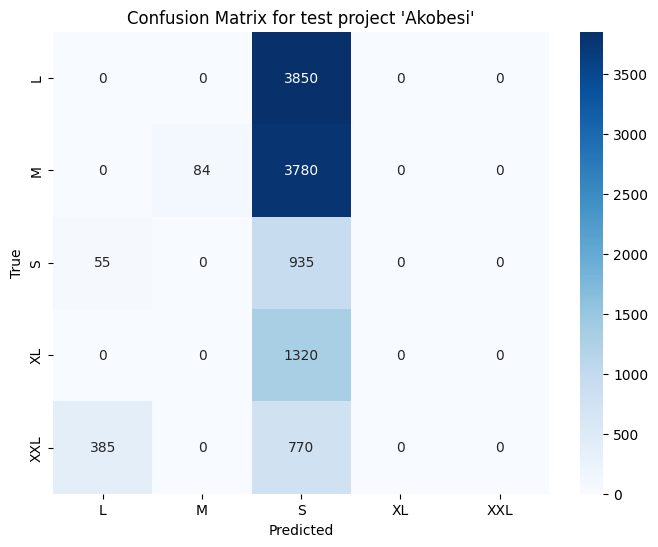

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       1.00      0.02      0.04      3864
           S       0.13      1.00      0.24       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.13      0.10      0.11     11179
   macro avg       0.23      0.20      0.06     11179
weighted avg       0.36      0.10      0.04     11179
 samples avg       0.09      0.10      0.09     11179

Precision: 0.35756508297034495     Recall: 0.09607299400661956      Accuracy: 0.08623311566329725      F1 Score: 0.03571557350187878

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

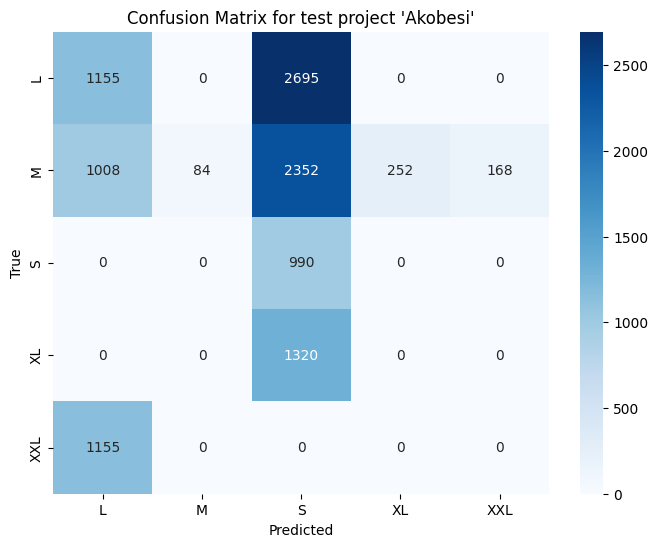

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.41      1.00      0.58      3850
           M       0.34      0.87      0.49      3864
           S       0.09      0.94      0.16       990
          XL       0.12      0.50      0.20      1320
         XXL       0.17      0.67      0.27      1155

   micro avg       0.24      0.86      0.38     11179
   macro avg       0.23      0.80      0.34     11179
weighted avg       0.30      0.86      0.43     11179
 samples avg       0.26      0.86      0.39     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.2984122898788906     Recall: 0.8565166830664639      Accuracy: 0.034439574201628055      F1 Score: 0.4347125321979446

Confusion matrix for test project 'Akobesi':


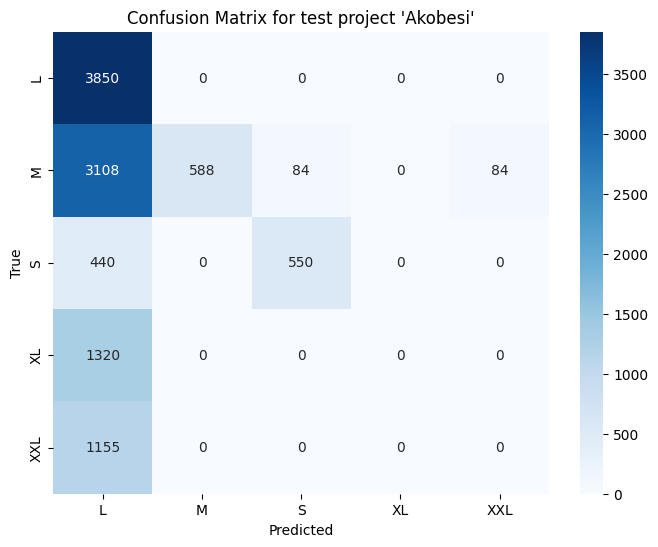

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.66      0.34      0.45       799
   macro avg       0.20      0.17      0.18       799
weighted avg       0.41      0.34      0.38       799
 samples avg       0.34      0.34      0.34       799

Precision: 0.4130162703379224     Recall: 0.344180225281602      Accuracy: 0.344180225281602      F1 Score: 0.37546933667083854

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

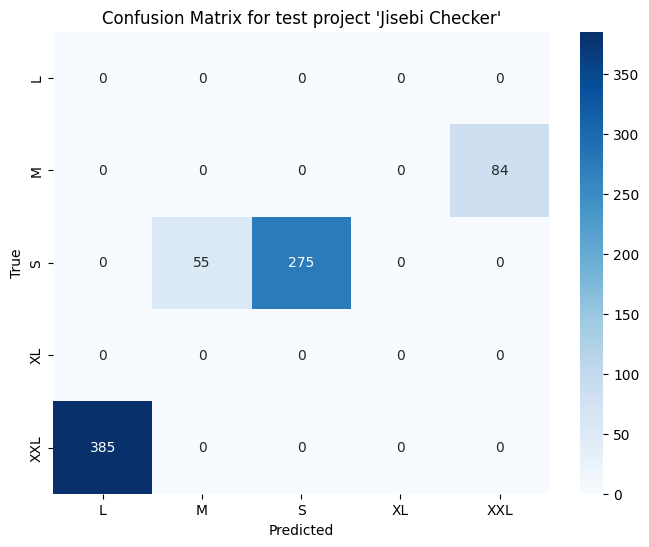

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.83      0.34      0.49       799
   macro avg       0.20      0.17      0.18       799
weighted avg       0.41      0.34      0.38       799
 samples avg       0.34      0.34      0.34       799

Precision: 0.4130162703379224     Recall: 0.344180225281602      Accuracy: 0.344180225281602      F1 Score: 0.37546933667083854

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

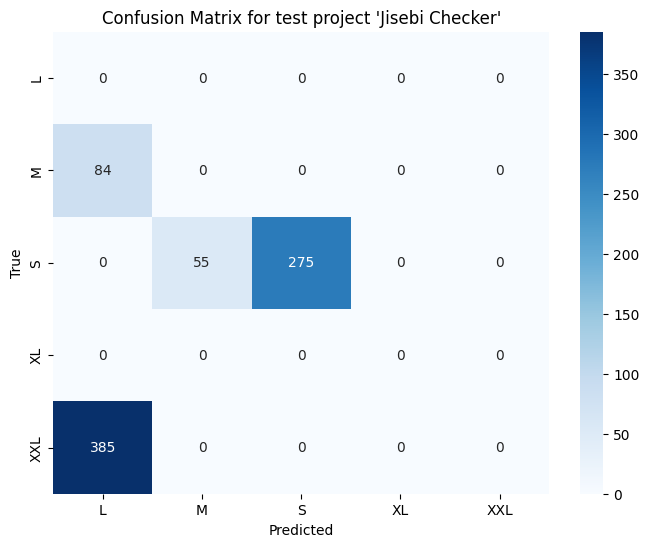

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.73      1.00      0.85       385

   micro avg       0.77      0.83      0.80       799
   macro avg       0.35      0.37      0.35       799
weighted avg       0.77      0.83      0.78       799
 samples avg       0.79      0.83      0.80       799

Precision: 0.7670489829844558     Recall: 0.8260325406758448      Accuracy: 0.7571964956195244      F1 Score: 0.7836390647825734

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

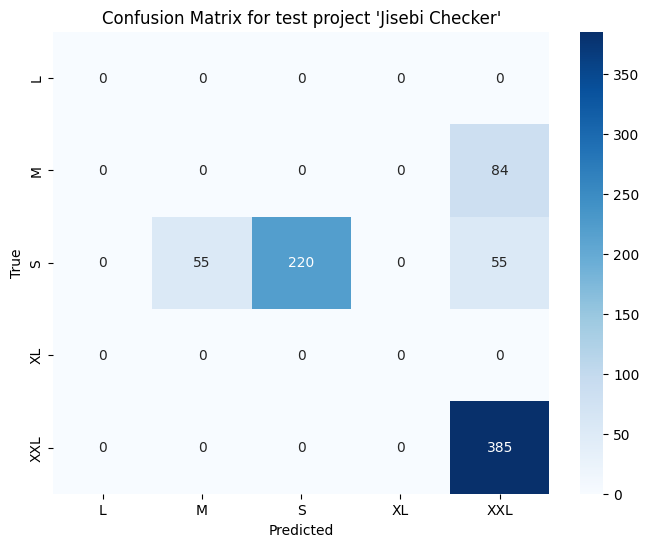

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       0.78      1.00      0.88       385

   micro avg       0.80      0.75      0.77       880
   macro avg       0.36      0.31      0.32       880
weighted avg       0.90      0.75      0.78       880
 samples avg       0.75      0.75      0.75       880

Precision: 0.9027777777777778     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7845982142857144

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

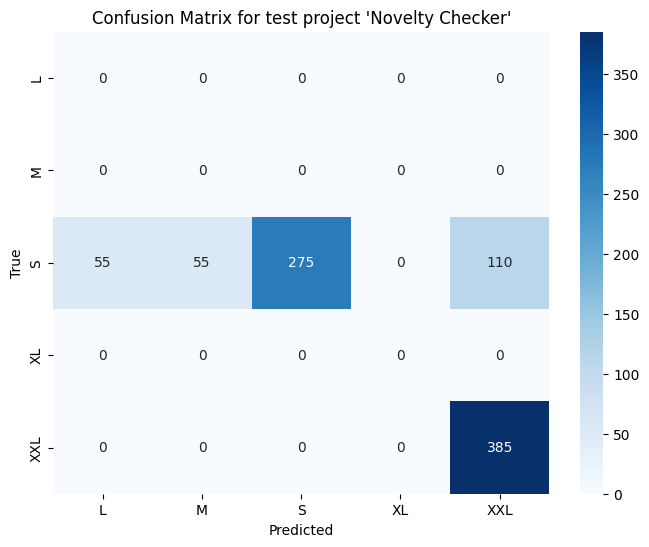

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.44      0.62       495
          XL       0.00      0.00      0.00         0
         XXL       0.78      1.00      0.88       385

   micro avg       0.73      0.69      0.71       880
   macro avg       0.36      0.29      0.30       880
weighted avg       0.90      0.69      0.73       880
 samples avg       0.69      0.69      0.69       880

Precision: 0.9027777777777778     Recall: 0.6875      Accuracy: 0.6875      F1 Score: 0.7289663461538461

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

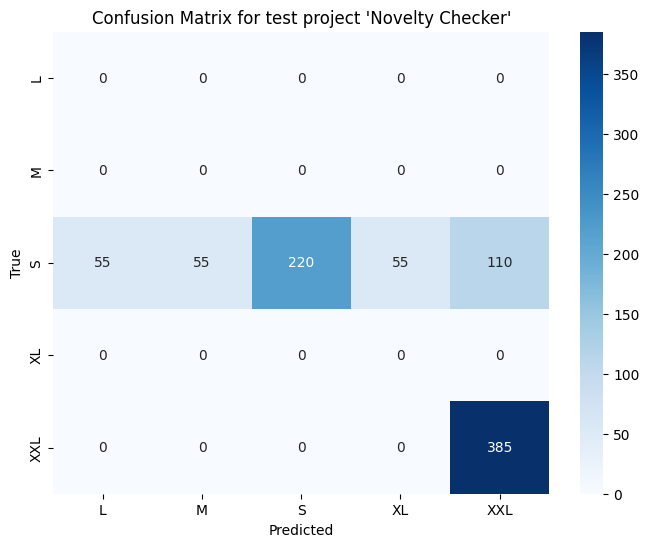

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80       495
          XL       0.00      0.00      0.00         0
         XXL       0.70      1.00      0.82       385

   micro avg       0.68      0.81      0.74       880
   macro avg       0.34      0.33      0.32       880
weighted avg       0.87      0.81      0.81       880
 samples avg       0.74      0.81      0.76       880

Precision: 0.86875     Recall: 0.8125      Accuracy: 0.6875      F1 Score: 0.8102941176470587

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

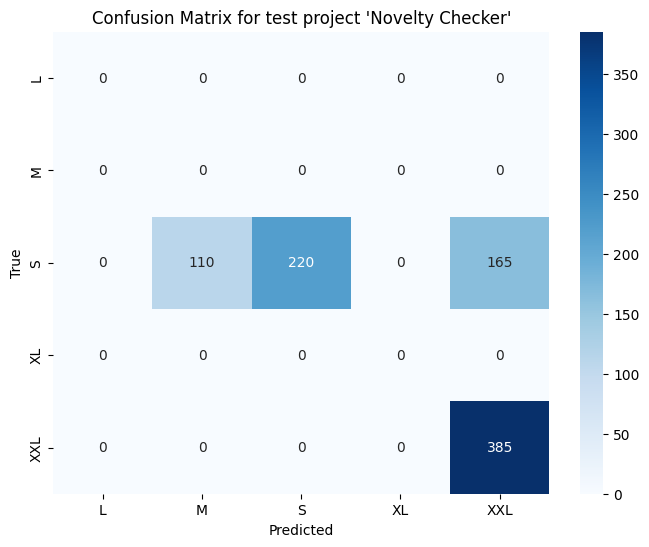

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.15      1.00      0.25        84
           S       0.53      0.80      0.64       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.37      0.25      0.30      2064
   macro avg       0.14      0.36      0.18      2064
weighted avg       0.15      0.25      0.18      2064
 samples avg       0.25      0.25      0.25      2064

Precision: 0.14802318887148383     Recall: 0.25387596899224807      Accuracy: 0.25387596899224807      F1 Score: 0.18085516854326703

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

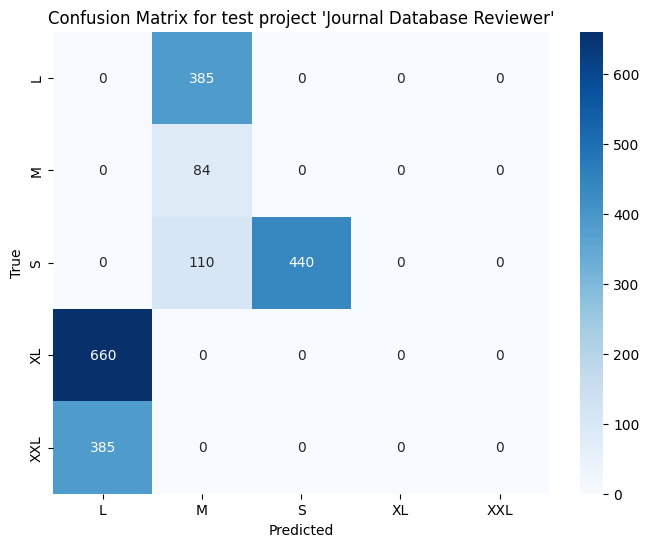

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.34      1.00      0.50        84
           S       0.36      0.40      0.38       550
          XL       0.00      0.00      0.00       660
         XXL       1.00      1.00      1.00       385

   micro avg       0.56      0.33      0.42      2064
   macro avg       0.34      0.48      0.38      2064
weighted avg       0.30      0.33      0.31      2064
 samples avg       0.32      0.33      0.32      2064

Precision: 0.2971595685065844     Recall: 0.3338178294573643      Accuracy: 0.3071705426356589      F1 Score: 0.30857664142547864

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

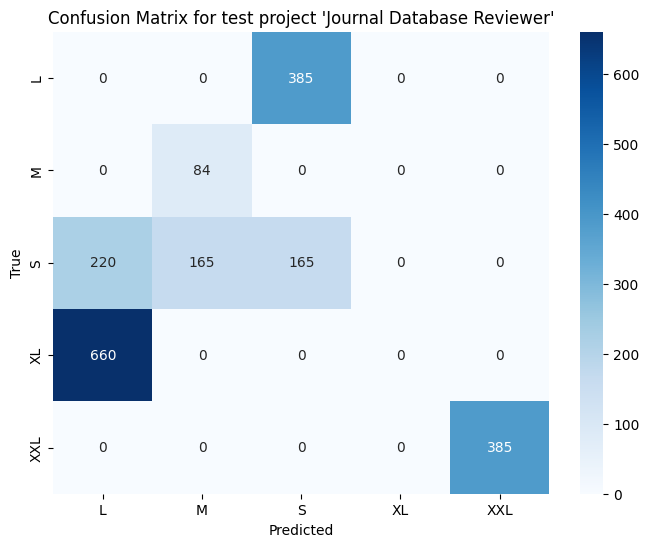

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.06      1.00      0.11        84
           S       0.33      1.00      0.49       550
          XL       0.00      0.00      0.00       660
         XXL       1.00      1.00      1.00       385

   micro avg       0.26      0.49      0.34      2064
   macro avg       0.28      0.60      0.32      2064
weighted avg       0.28      0.49      0.32      2064
 samples avg       0.39      0.49      0.43      2064

Precision: 0.2761642224335113     Recall: 0.4937015503875969      Accuracy: 0.2931201550387597      F1 Score: 0.32246510767255954

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


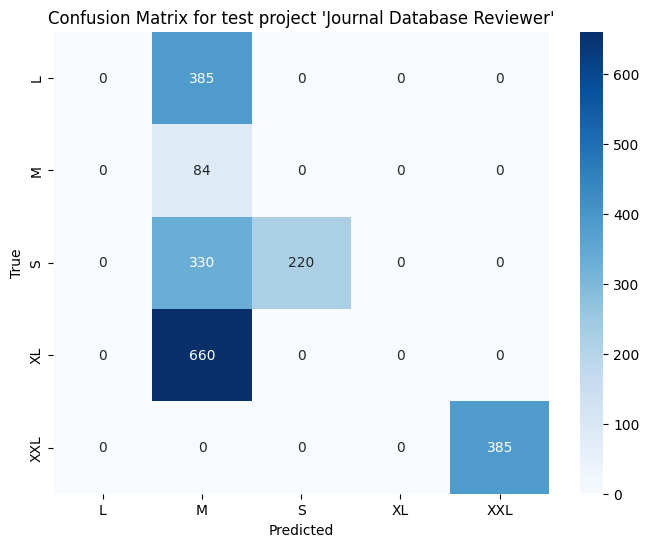

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.57      0.67      0.61       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.33      0.11      0.17       993
   macro avg       0.11      0.13      0.12       993
weighted avg       0.09      0.11      0.10       993
 samples avg       0.11      0.11      0.11       993

Precision: 0.09421621453265643     Recall: 0.1107754279959718      Accuracy: 0.1107754279959718      F1 Score: 0.10182699509379023

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

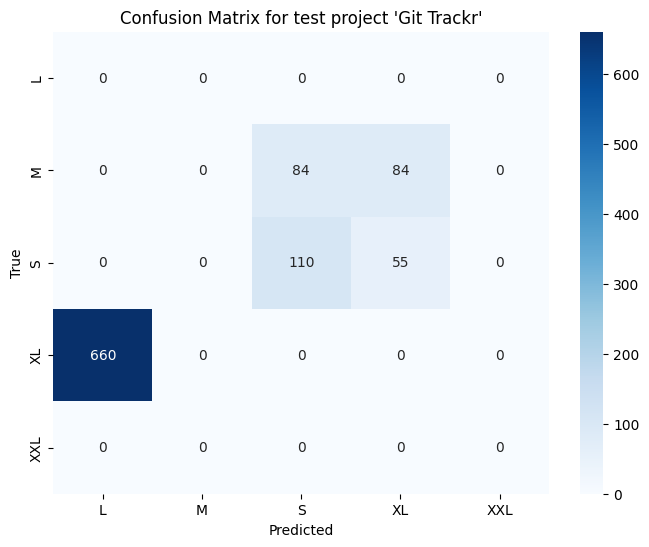

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.57      0.67      0.61       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.10      0.11      0.11       993
   macro avg       0.11      0.13      0.12       993
weighted avg       0.09      0.11      0.10       993
 samples avg       0.11      0.11      0.11       993

Precision: 0.09421621453265643     Recall: 0.1107754279959718      Accuracy: 0.1107754279959718      F1 Score: 0.10182699509379023

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

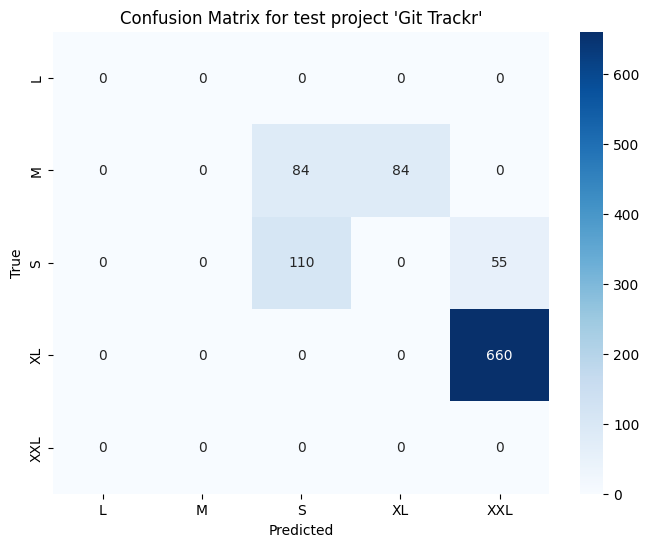

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.40      0.33      0.36       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.06      0.06      0.06       993
   macro avg       0.08      0.07      0.07       993
weighted avg       0.07      0.06      0.06       993
 samples avg       0.06      0.06      0.06       993

Precision: 0.06574800582494729     Recall: 0.0553877139979859      Accuracy: 0.0553877139979859      F1 Score: 0.0601248211162347

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

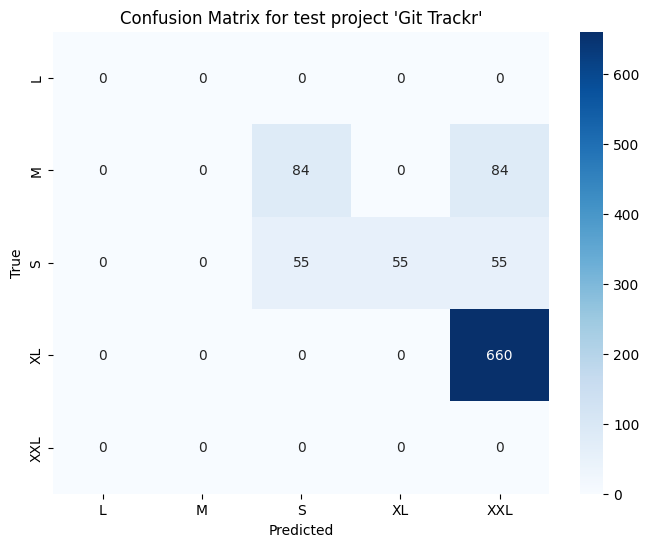

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.20      0.75      0.32       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.19      0.19      0.19       880
   macro avg       0.04      0.15      0.06       880
weighted avg       0.05      0.19      0.08       880
 samples avg       0.16      0.19      0.17       880

Precision: 0.05     Recall: 0.1875      Accuracy: 0.125      F1 Score: 0.07894736842105264

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

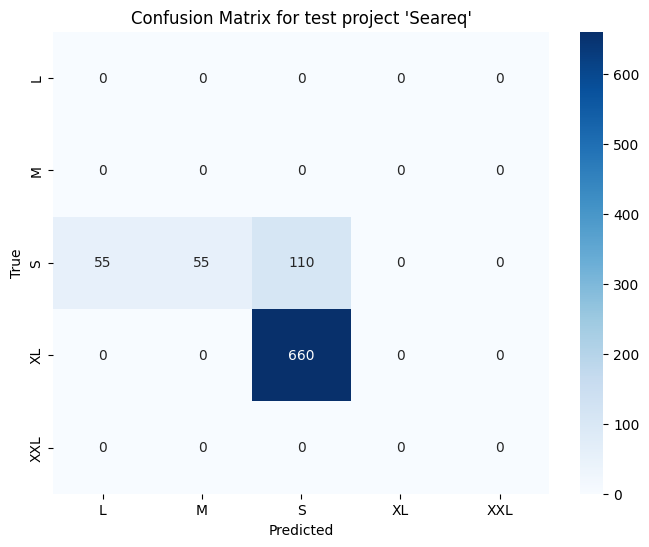

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.25      0.40       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.06      0.12       880
   macro avg       0.20      0.05      0.08       880
weighted avg       0.25      0.06      0.10       880
 samples avg       0.06      0.06      0.06       880

Precision: 0.25     Recall: 0.0625      Accuracy: 0.0625      F1 Score: 0.1

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

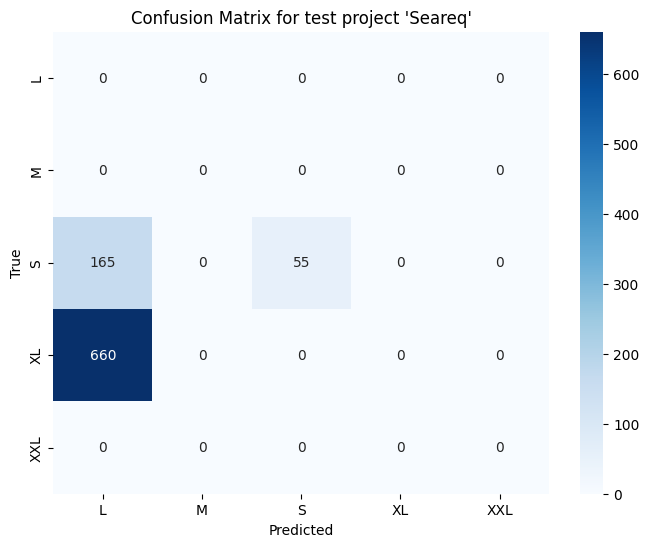

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.14      0.50      0.22       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.06      0.12      0.08       880
   macro avg       0.03      0.10      0.04       880
weighted avg       0.04      0.12      0.06       880
 samples avg       0.04      0.12      0.06       880

Precision: 0.03571428571428571     Recall: 0.125      Accuracy: 0.0      F1 Score: 0.05555555555555556

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


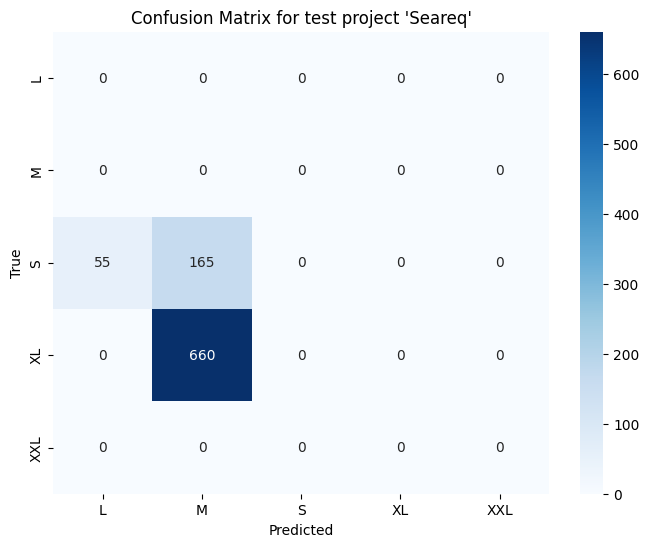

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       1.00      0.50      0.67       168
           S       0.89      0.80      0.84       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.61      0.54      0.57      1378
   macro avg       0.38      0.26      0.30      1378
weighted avg       0.65      0.54      0.58      1378
 samples avg       0.54      0.54      0.54      1378

Precision: 0.6530151224308254     Recall: 0.5399129172714079      Accuracy: 0.5399129172714079      F1 Score: 0.5849583873322104

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

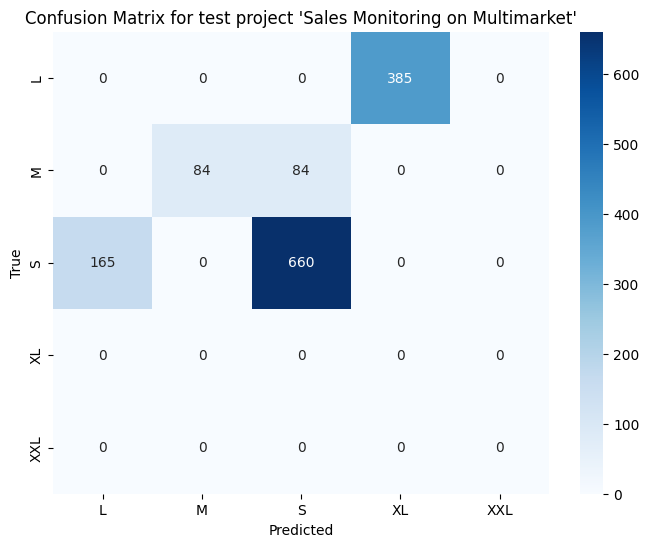

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       1.00      0.50      0.67       168
           S       1.00      0.53      0.70       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.91      0.38      0.54      1378
   macro avg       0.40      0.21      0.27      1378
weighted avg       0.72      0.38      0.50      1378
 samples avg       0.38      0.38      0.38      1378

Precision: 0.7206095791001451     Recall: 0.3802612481857765      Accuracy: 0.3802612481857765      F1 Score: 0.49775982835868

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

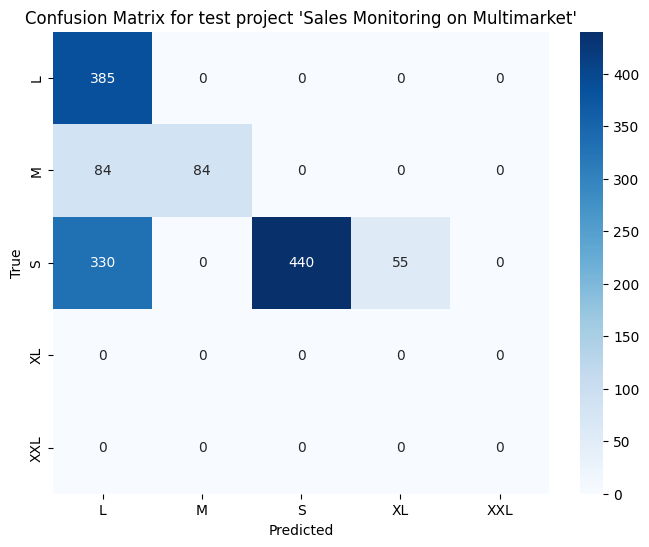

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.70      1.00      0.82       385
           M       0.17      1.00      0.29       168
           S       0.60      1.00      0.75       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.32      1.00      0.49      1378
   macro avg       0.29      0.60      0.37      1378
weighted avg       0.57      1.00      0.71      1378
 samples avg       0.42      1.00      0.55      1378

Precision: 0.5746337532356658     Recall: 1.0      Accuracy: 0.15965166908563136      F1 Score: 0.7137782130402999

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


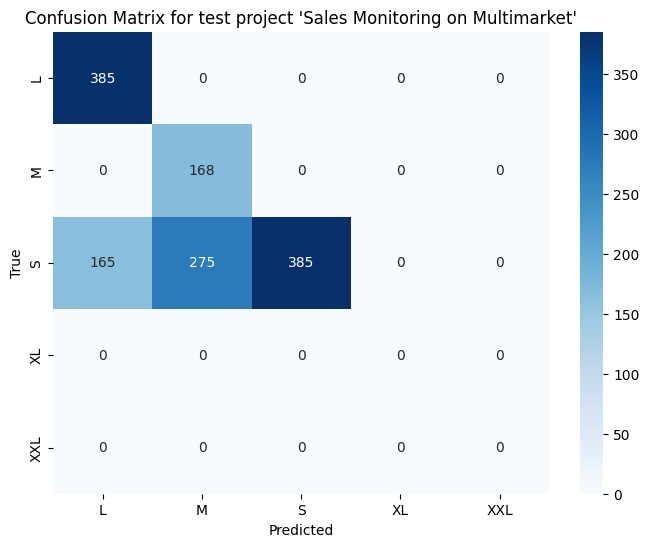

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      1.00      1.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       1.00      0.32      0.48      1129
   macro avg       0.40      0.40      0.40      1129
weighted avg       0.32      0.32      0.32      1129
 samples avg       0.32      0.32      0.32      1129

Precision: 0.3179805137289637     Recall: 0.3179805137289637      Accuracy: 0.3179805137289637      F1 Score: 0.3179805137289637

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

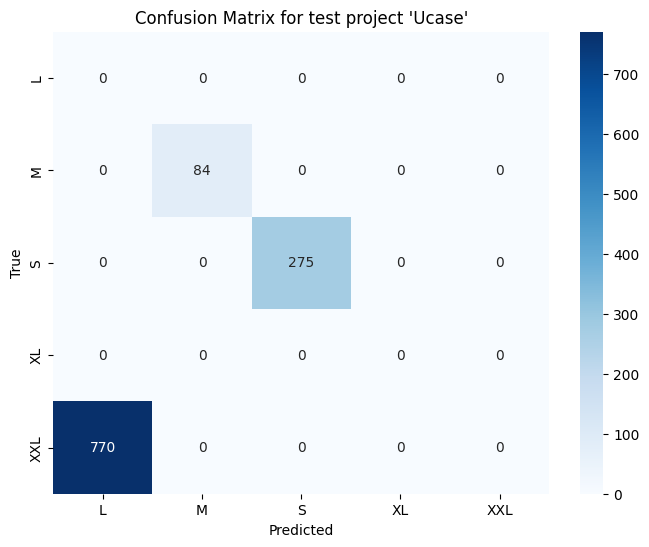

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      0.80      0.89       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00       770

   micro avg       1.00      0.95      0.98      1129
   macro avg       0.60      0.56      0.58      1129
weighted avg       1.00      0.95      0.97      1129
 samples avg       0.95      0.95      0.95      1129

Precision: 1.0     Recall: 0.9512843224092117      Accuracy: 0.9512843224092117      F1 Score: 0.9729357346717842

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

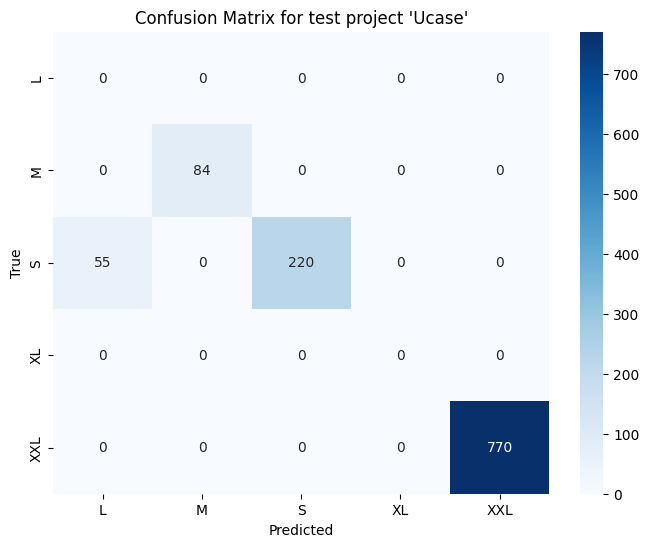

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.77      1.00      0.87       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00       770

   micro avg       0.89      1.00      0.94      1129
   macro avg       0.55      0.60      0.57      1129
weighted avg       0.94      1.00      0.97      1129
 samples avg       0.94      1.00      0.96      1129

Precision: 0.9430067281667657     Recall: 1.0      Accuracy: 0.8768821966341895      F1 Score: 0.9677277845613074

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

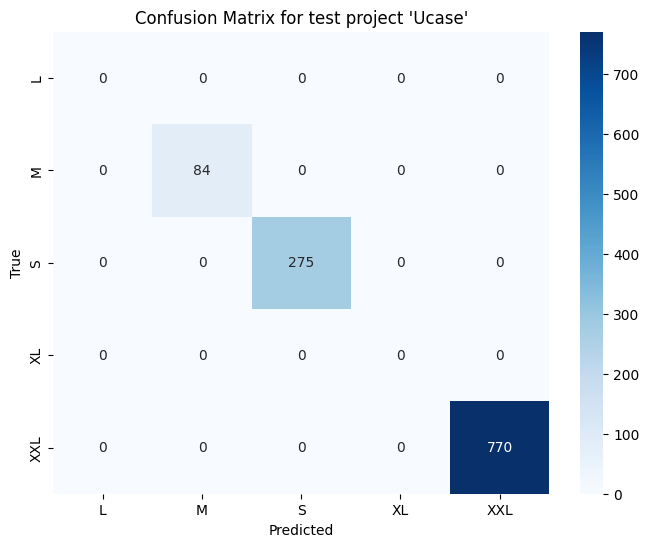

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      0.71      0.83       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       1.00      0.22      0.36      1624
   macro avg       0.40      0.34      0.37      1624
weighted avg       0.29      0.22      0.25      1624
 samples avg       0.22      0.22      0.22      1624

Precision: 0.28879310344827586     Recall: 0.2210591133004926      Accuracy: 0.2210591133004926      F1 Score: 0.2492816091954023

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

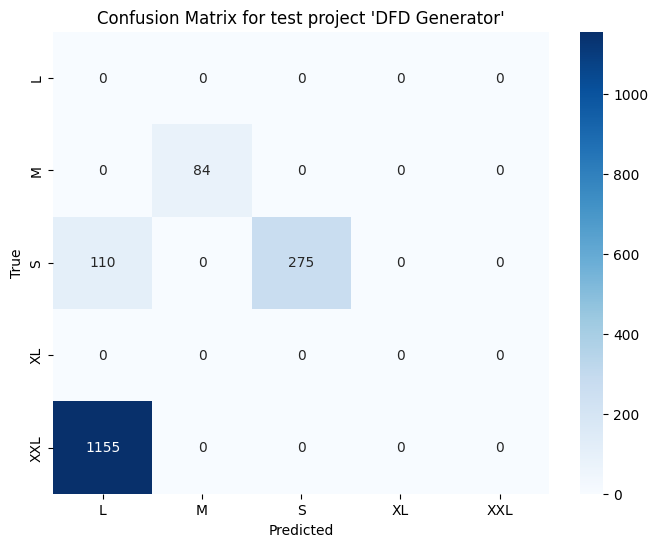

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.18      1.00      0.30        84
           S       0.46      0.86      0.60       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.35      0.25      0.29      1624
   macro avg       0.13      0.37      0.18      1624
weighted avg       0.12      0.25      0.16      1624
 samples avg       0.25      0.25      0.25      1624

Precision: 0.11868047032740807     Recall: 0.25492610837438423      Accuracy: 0.25492610837438423      F1 Score: 0.1579550414666085

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

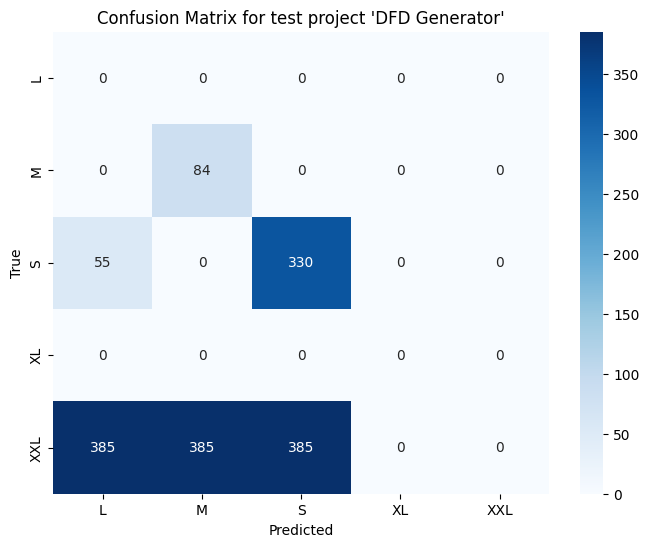

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.72      0.57      0.64       385
          XL       0.00      0.00      0.00         0
         XXL       0.91      1.00      0.95      1155

   micro avg       0.88      0.90      0.89      1624
   macro avg       0.53      0.51      0.52      1624
weighted avg       0.87      0.90      0.88      1624
 samples avg       0.87      0.90      0.88      1624

Precision: 0.8726500236723743     Recall: 0.8983990147783252      Accuracy: 0.8466748768472906      F1 Score: 0.8819972724087882

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

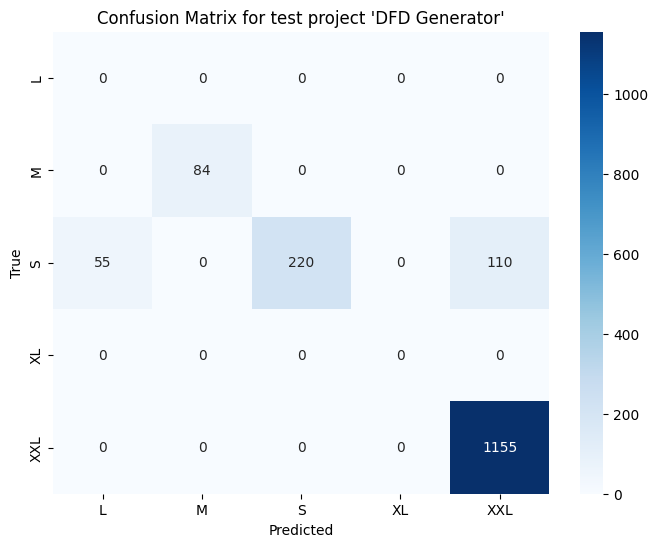

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.29      0.71      0.42       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.35      0.17      0.22      2174
   macro avg       0.26      0.34      0.28      2174
weighted avg       0.09      0.17      0.11      2174
 samples avg       0.17      0.17      0.17      2174

Precision: 0.09072460630986526     Recall: 0.16513339466421342      Accuracy: 0.16513339466421342      F1 Score: 0.11242716957988348

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

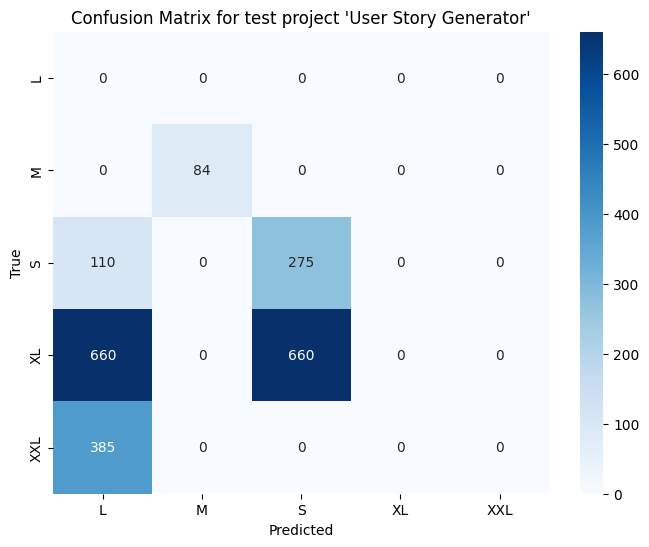

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.33      0.86      0.48       385
          XL       0.00      0.00      0.00      1320
         XXL       0.21      1.00      0.34       385

   micro avg       0.27      0.37      0.31      2174
   macro avg       0.31      0.57      0.36      2174
weighted avg       0.13      0.37      0.18      2174
 samples avg       0.34      0.37      0.35      2174

Precision: 0.13412973284990168     Recall: 0.3675252989880405      Accuracy: 0.3169273229070837      F1 Score: 0.18411380617946013

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

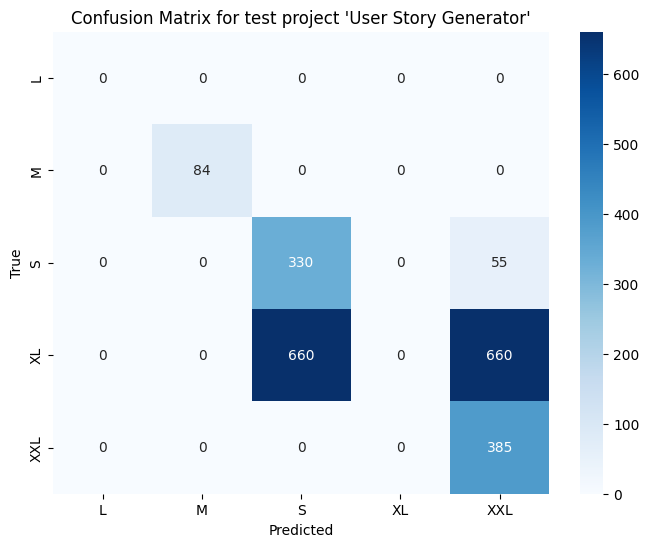

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.27      0.71      0.39       385
          XL       0.00      0.00      0.00      1320
         XXL       0.33      1.00      0.50       385

   micro avg       0.33      0.34      0.34      2174
   macro avg       0.32      0.54      0.38      2174
weighted avg       0.15      0.34      0.20      2174
 samples avg       0.32      0.34      0.33      2174

Precision: 0.14546192113715517     Recall: 0.3422263109475621      Accuracy: 0.30358785648574055      F1 Score: 0.19655891827004984

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

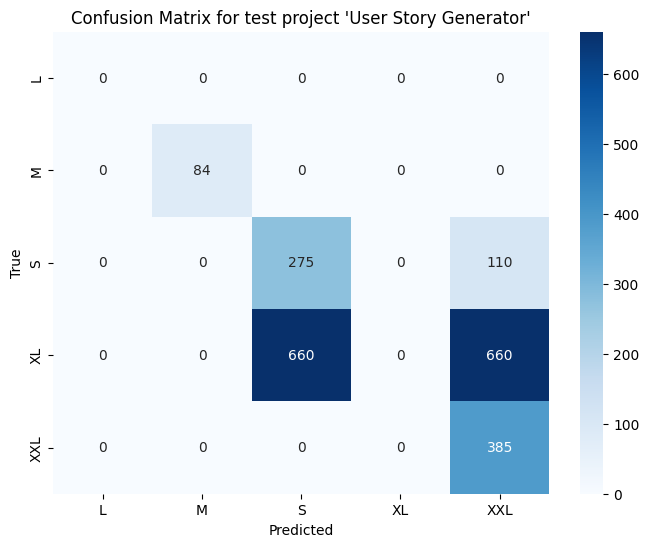

In [10]:
# Model (Teks) <== TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

unique_projects = df['Project Name'].unique()


accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = tfidf_df.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = tfidf_df.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [11]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.353359,0.091153,0.083639,0.028828,0.357565,0.096073,0.086233,0.035716,0.298412,0.856517,0.034440,0.434713
1,Jisebi Checker,0.413016,0.344180,0.344180,0.375469,0.413016,0.344180,0.344180,0.375469,0.767049,0.826033,0.757196,0.783639
2,Novelty Checker,0.902778,0.750000,0.750000,0.784598,0.902778,0.687500,0.687500,0.728966,0.868750,0.812500,0.687500,0.810294
3,Journal Database Reviewer,0.148023,0.253876,0.253876,0.180855,0.297160,0.333818,0.307171,0.308577,0.276164,0.493702,0.293120,0.322465
4,Git Trackr,0.094216,0.110775,0.110775,0.101827,0.094216,0.110775,0.110775,0.101827,0.065748,0.055388,0.055388,0.060125
5,Seareq,0.050000,0.187500,0.125000,0.078947,0.250000,0.062500,0.062500,0.100000,0.035714,0.125000,0.000000,0.055556
6,Sales Monitoring on Multimarket,0.653015,0.539913,0.539913,0.584958,0.720610,0.380261,0.380261,0.497760,0.574634,1.000000,0.159652,0.713778
7,Ucase,0.317981,0.317981,0.317981,0.317981,1.000000,0.951284,0.951284,0.972936,0.943007,1.000000,0.876882,0.967728
8,DFD Generator,0.288793,0.221059,0.221059,0.249282,0.118680,0.254926,0.254926,0.157955,0.872650,0.898399,0.846675,0.881997
9,User Story Generator,0.090725,0.165133,0.165133,0.112427,0.134130,0.367525,0.316927,0.184114,0.145462,0.342226,0.303588,0.196559


In [12]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.2911556527153139, 0.3501758313452986, 0.401444053791075]
